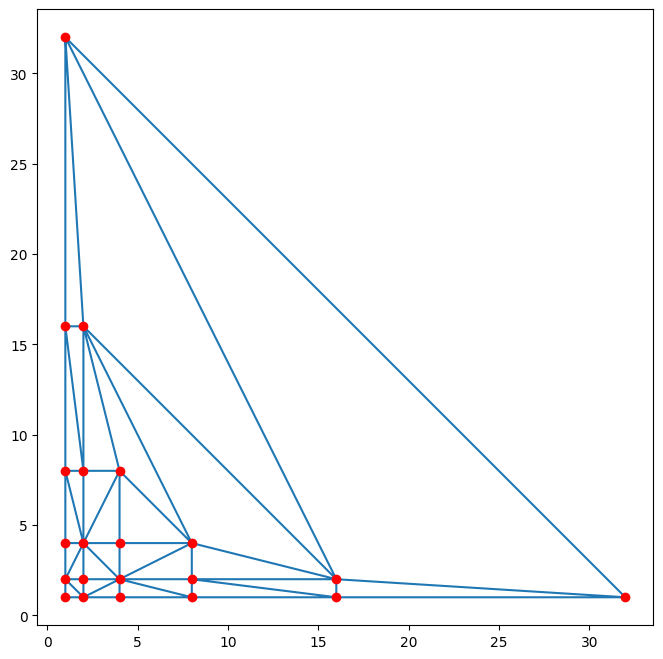

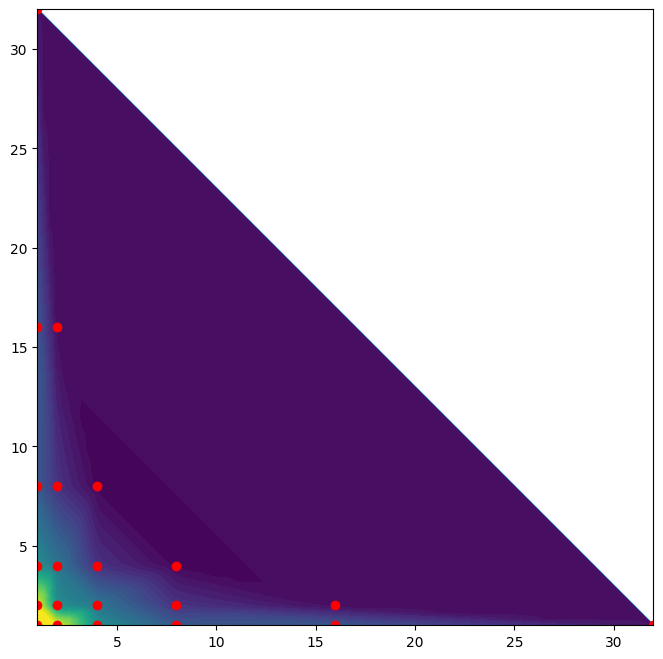

1 1 122137.76278409091
1 2 122043.33167613637
1 3 111677.54245580808
1 4 108250.79790088384
1 5 107081.0542929293
1 6 101767.97597064395
1 7 95460.4973169192
1 8 89153.01866319444
1 9 82845.5400094697
1 10 78613.5859375
1 11 77255.43513257576
1 12 75897.28432765152
1 13 74539.13352272728
1 14 73180.98271780302
1 15 71822.83191287878
1 16 70464.68110795454
1 17 69106.5303030303
1 18 67748.37949810605
1 19 66267.15123895202
1 20 64718.23037997159
1 21 63169.30952099116
1 22 61620.38866201074
1 23 61054.74747474748
1 24 61029.910106928655
1 25 61005.072739109855
1 26 60980.23537129103
1 27 60955.39800347222
1 28 60930.56063565341
1 29 60905.7232678346
1 30 60880.88590001578
1 31 60856.04853219696
1 32 60831.21116437816
2 1 122043.33167613637
2 2 111677.54245580808
2 3 98846.62728851009
2 4 95419.88273358587
2 5 94250.1391256313
2 6 93080.39551767676
2 7 91910.65190972222
2 8 86597.57358743687
2 9 80290.09493371211
2 10 76058.14086174243
2 11 74699.99005681819
2 12 73341.83925189394
2 13 7

In [1]:
import numpy as np

from scipy.interpolate import RegularGridInterpolator
from scipy.spatial import Delaunay
from scipy.interpolate import griddata

show_map = True
if show_map:
    from matplotlib import pyplot as plt

def extract_timestep_per_second(folder_name):
    f = open(folder_name+"log.lammps", "r")
    for x in f:
        if x[:12] == "Performance:":
            Performance = x
    timestep_per_second = Performance.split()[3]
    return np.float32(timestep_per_second)

possible_combinations = np.loadtxt("lammps_input/possible_combination.dat")

actual_results = []
for nt, nx, ny in np.int32(possible_combinations):
    folder_name = 'nt'+str(nt)+'nx'+str(nx)+'ny'+str(ny)+'/'
    timestep_per_second = extract_timestep_per_second(folder_name)
    actual_results.append([nx, ny, timestep_per_second])
    if nx != ny:
        actual_results.append([ny, nx, timestep_per_second])
actual_results = np.array(actual_results)

# 2D extrapolation
Xi, Yi, Zi = actual_results.T

Pi = np.array([Xi, Yi]).transpose()
tri = Delaunay(Pi)

if show_map:
    fig1, ax = plt.subplots(figsize=(8, 8))
    ax.set_box_aspect(1)
    ax.plot(Xi, Yi, "or", label = "Data")
    ax.triplot(Xi, Yi , tri.simplices.copy())
    plt.show()

N = 100
x = np.linspace(1., 32., N)
y = np.linspace(1., 32., N)
X, Y = np.meshgrid(x, y)
P = np.array([X.flatten(), Y.flatten() ]).transpose()

Z_nearest = griddata(Pi, Zi, P, method = "linear").reshape([N, N])

if show_map:
    fig2, ax = plt.subplots(figsize=(8, 8))
    ax.set_box_aspect(1)
    ax.plot(Xi, Yi, "or", label = "Data")
    ax.triplot(Xi, Yi , tri.simplices.copy())
    ax.contourf(X, Y, Z_nearest, 50)
    plt.show()

performance_extrapolated = []
for nx in np.arange(1, 32+1):
    for ny in np.arange(1, 32+1):
        folder_name = 'nt'+str(nt)+'nx'+str(nx)+'ny'+str(ny)+'/'
        timestep_per_second = Z_nearest[nx][ny]
        print(nx, ny, timestep_per_second)
        performance_extrapolated.append([nx, ny, timestep_per_second])
performance_extrapolated = np.array(performance_extrapolated)
np.savetxt("performance_extrapolated.dat", performance_extrapolated)